In [1]:
# Q2 cross-validation for decision tree
from sklearn.datasets import make_blobs
from sklearn.metrics import zero_one_loss
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

In [2]:
def custom_zer_one_score(model, X, y):
    y_pred = model.predict(X)
    return zero_one_loss(y, y_pred)

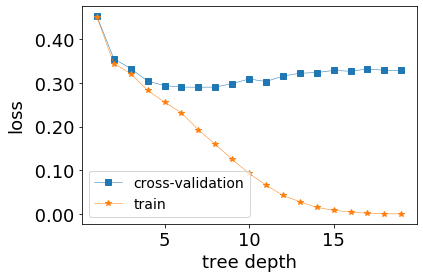

In [3]:
if __name__ == "__main__":
    X, y = make_blobs(n_samples=5000, n_features=10, centers=3,
                      random_state=10, cluster_std=10)

    model = DecisionTreeClassifier(random_state=0)

    tree_depth = range(1, 20)

    xlist = []
    trlist = []
    cvlist = []

    for d in tree_depth:
        xlist.append(d)
        model.max_depth = d
        cv = np.mean(cross_val_score(model, X, y, cv=10,
                                     scoring=custom_zer_one_score))
        cvlist.append(cv)
        model.fit(X, y)
        trlist.append(custom_zer_one_score(model, X, y))

    font = {'family': 'sans-serif',
            'weight': 'normal',
            'size': 18}
    plt.rc('font', **font)

    f = plt.figure()
    ax = plt.gca()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%5.2f'))

    cv = plt.plot(xlist, cvlist, '-s', linewidth=0.5,
                  label='cross-validation')
    tr = plt.plot(xlist, trlist, '-*', linewidth=0.5, label='train')
    plt.xlabel('tree depth', fontsize=18, color='black')
    plt.ylabel('loss', fontsize=18, color='black')
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    plt.legend(fontsize=14, loc=3)
    plt.show()